# Investigating Melatonin Levels over Relative Time

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("datasets/008ExerciseFile.csv")

In [2]:
display(data)

,rel_time,m_level
0,-10.000000,166.846602
1,-9.797980,243.656949
2,-9.595960,354.591642
3,-9.393939,209.023218
4,-9.191919,283.431508
...,...,...
95,9.191919,255.174991
96,9.393939,152.987761
97,9.595960,142.685158
98,9.797980,189.684193


### Testing First-Order Polynomial

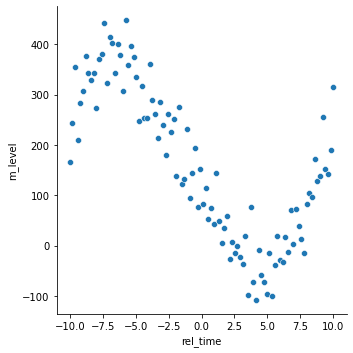

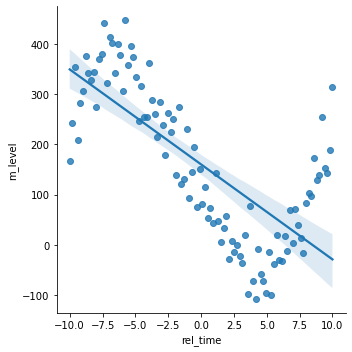

In [4]:
sns.relplot(data=data, x='rel_time', y = 'm_level')
sns.lmplot(data=data, x='rel_time', y = 'm_level')

In [5]:
myfit = np.polyfit(x=data['rel_time'], y = data['m_level'], deg=1)
print(myfit)

[-18.91517148 160.25727447]


<AxesSubplot:xlabel='rel_time', ylabel='m_level'>

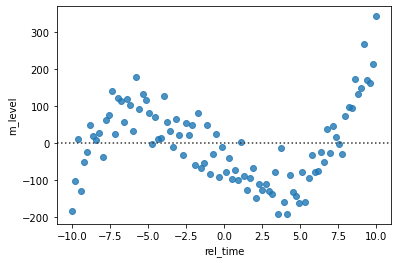

In [6]:
sns.residplot(data=data, x='rel_time', y = 'm_level')

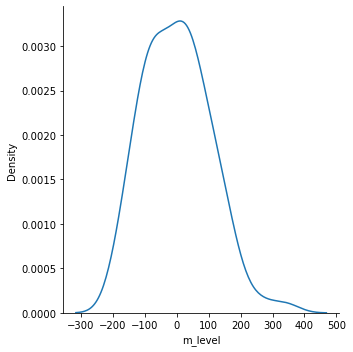

In [8]:
fitvals = np.polyval(myfit, data['rel_time'])
myres = data['m_level'] - fitvals
sns.displot(myres, kind = 'kde')

In [9]:
np.std(myres)

104.76481228544043

I reject this fit because the points at the start and end of the line do not match the first degree polynomials. The residual plot shows that there are many curves in residuals rather than being scattered.

### Testing Third-Order Polynomial

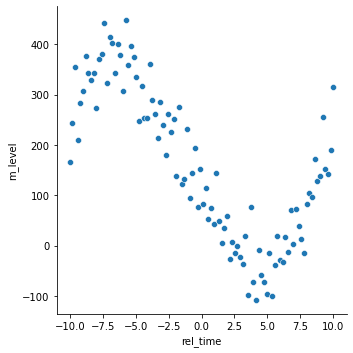

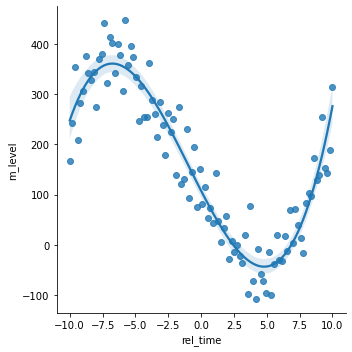

In [10]:
sns.relplot(data=data, x='rel_time', y = 'm_level')
sns.lmplot(data=data, x='rel_time', y = 'm_level', order=3)

In [13]:
myfit = np.polyfit(x=data['rel_time'], y = data['m_level'], deg=3)
print(myfit)

[  0.52406776   1.5417871  -50.9901931  107.82613075]


<AxesSubplot:xlabel='rel_time', ylabel='m_level'>

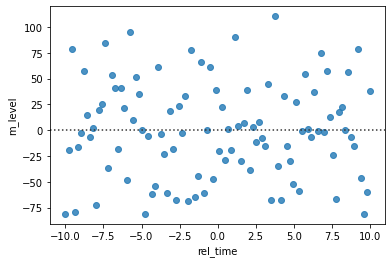

In [14]:
sns.residplot(data=data, x='rel_time', y = 'm_level', order = 3)

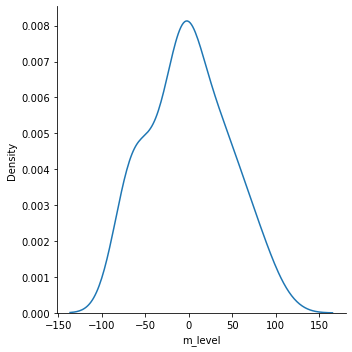

In [15]:
fitvals = np.polyval(myfit, data['rel_time'])
myres = data['m_level'] - fitvals
sns.displot(myres, kind = 'kde')

In [16]:
np.std(myres)

46.02814372678916

I accept this fit because the third order polynomials has a better fit as shown with the scattered residual plot and normal distribution.

### Checking other polynomials

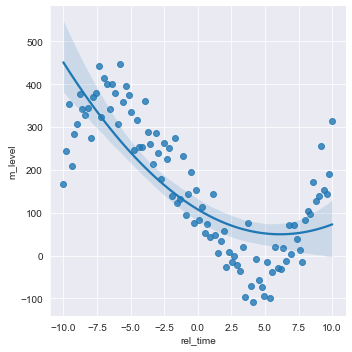

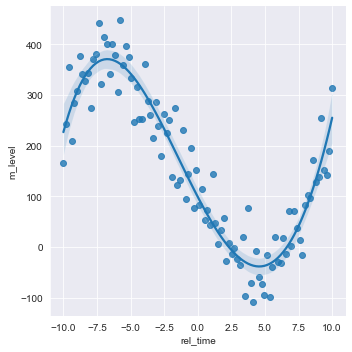

In [22]:
sns.lmplot(data=data, x='rel_time', y = 'm_level', order=2)
sns.lmplot(data=data, x='rel_time', y = 'm_level', order=4)

To make sure, I wanted to check the second-order and fourth-order polynomials. The second-order polynomial does not fit at the start and end of the line as the points curve away. The fourth-order polynomial looks similar to the third-order polynomial but since there are 2 curves rather than 3, the third-order polynomial fits better.

### Finished Plot

Text(0.5, 1.0, 'Diurnal Fluctuations in Melatonin Level over Relative Time of Day')

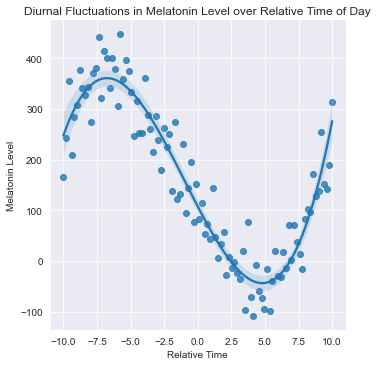

In [21]:
sns.set_style("darkgrid")
sns.lmplot(data=data, x='rel_time', y = 'm_level', order=3)
plt.xlabel("Relative Time")
plt.ylabel("Melatonin Level")
plt.title("Diurnal Fluctuations in Melatonin Level over Relative Time of Day")